# 모듈 등록

In [22]:
import os ,time, json

from glob import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd, cv2
from tqdm import tqdm
from easydict import EasyDict
from sklearn.preprocessing import LabelEncoder #Label Encoder로 숫자로 변경함

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore')

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Load Data

A1 = 구진 플라크  
A2 = 비듬 각질 상피성 잔고리  
A3 = 태선화 과다 색소 침착  
A4 = 농포 여드름  
A5 = 미란 궤양  
A6 = 결절 종괴  

In [23]:
                
유증상 = []
무증상 = []

A1 = []
A2 = []
A3 = []
A4 = []
A5 = []
A6 = []

root = "/home/twogudack/petclinc/Dataset/cropdata"


def fast_scandir(dirname):
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders
    

for i in fast_scandir(root+"/유증상"):
    for image in glob(i + "/*.jpg"):
        유증상.append(image)
        
for i in fast_scandir(root+"/무증상"):
    for image in glob(i + "/*.jpg"):
        무증상.append(image)

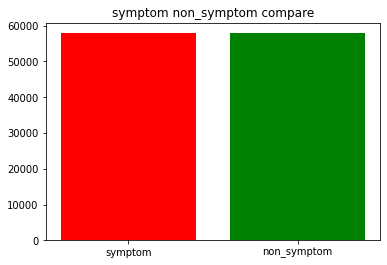

In [24]:
plt.title("symptom non_symptom compare")
plt.bar(["symptom","non_symptom"],[len(유증상),len(무증상)], color=['r','g'])
plt.show()

증상 유증상은 각각 6만장씩 존재함

### 유증상 데이터 분류 시작화

In [25]:
for i in 유증상:
    if "A1" in i:
        A1.append(i)
    elif "A2" in i:
        A2.append(i)
    elif "A3" in i:
        A3.append(i)
    elif "A4" in i:
        A4.append(i)
    elif "A5" in i:
        A5.append(i)
    elif "A6" in i:
        A6.append(i)

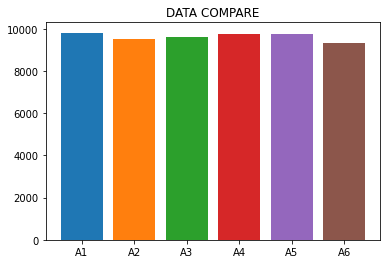

In [26]:
plt.title("DATA COMPARE")
plt.bar(["A1","A2","A3","A4","A5","A6"], [len(A1),len(A2),len(A3),len(A4),len(A5),len(A6)], color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
plt.show()

유증상 데이터는 병별로 각각 만장씩 존재함 (무증상은 6만장)

## 부위별로 데이터를 나눔

A = 배 다리 연결 부위  
B = 배  
H = 귀  
L = 발  

A1_data = [A,B,H,L]  
region_A = [A1,A2,A3,A4,A5,A6]

In [27]:
A1_data = [[],[],[],[]]
A2_data = [[],[],[],[]]
A3_data = [[],[],[],[]]
A4_data = [[],[],[],[]]
A5_data = [[],[],[],[]]
A6_data = [[],[],[],[]]

def seperateRegion(dis,types):
    for imgPath in dis:
        jsonPath = imgPath.replace('jpg','json')
        with open(jsonPath) as f:
            jsonData = json.load(f)
            region = jsonData['metaData']['region']   
            if 'A' == region:
                types[0].append(imgPath)
            elif 'B' == region:
                types[1].append(imgPath)
            elif 'H' == region:
                types[2].append(imgPath)
            elif 'L' == region:
                    types[3].append(imgPath)
            
seperateRegion(A1,A1_data)
seperateRegion(A2,A2_data)
seperateRegion(A3,A3_data)
seperateRegion(A4,A4_data)
seperateRegion(A5,A5_data)
seperateRegion(A6,A6_data)

region_A = [A1_data[0],A2_data[0],A3_data[0],A4_data[0],A5_data[0],A6_data[0]]
region_B = [A1_data[1],A2_data[1],A3_data[1],A4_data[1],A5_data[1],A6_data[1]]
region_H = [A1_data[2],A2_data[2],A3_data[2],A4_data[2],A5_data[2],A6_data[2]]
region_L = [A1_data[3],A2_data[3],A3_data[3],A4_data[3],A5_data[3],A6_data[3]]

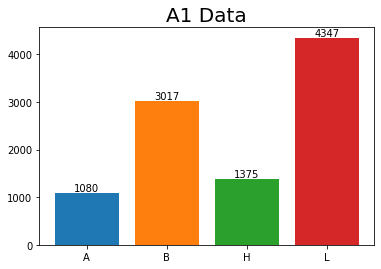

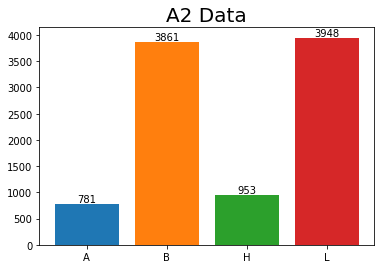

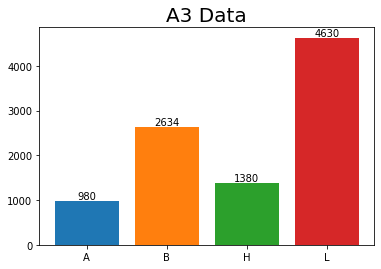

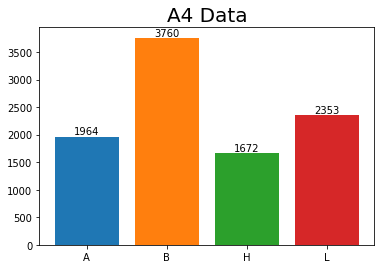

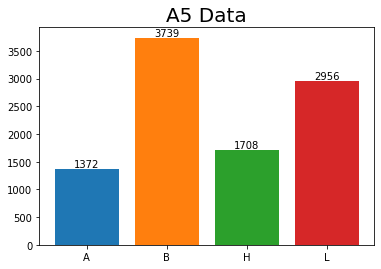

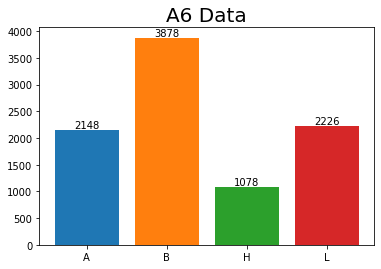

In [30]:
index = ["A","B","H","L"]

region_a1 = [len(A1_data[0]),len(A1_data[1]),len(A1_data[2]),len(A1_data[3])]
region_a2 = [len(A2_data[0]),len(A2_data[1]),len(A2_data[2]),len(A2_data[3])]
region_a3 = [len(A3_data[0]),len(A3_data[1]),len(A3_data[2]),len(A3_data[3])]
region_a4 = [len(A4_data[0]),len(A4_data[1]),len(A4_data[2]),len(A4_data[3])]
region_a5 = [len(A5_data[0]),len(A5_data[1]),len(A5_data[2]),len(A5_data[3])]
region_a6 = [len(A6_data[0]),len(A6_data[1]),len(A6_data[2]),len(A6_data[3])]


plt.title("A1 Data", fontsize = 20)
plt.bar(index, region_a1, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a1[i], region_a1[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.title("A2 Data", fontsize = 20)
plt.bar(index, region_a2, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a2[i], region_a2[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.title("A3 Data", fontsize = 20)
plt.bar(index, region_a3, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a3[i], region_a3[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.title("A4 Data", fontsize = 20)
plt.bar(index, region_a4, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a4[i], region_a4[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.title("A5 Data", fontsize = 20)
plt.bar(index, region_a5, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a5[i], region_a5[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.title("A6 Data", fontsize = 20)
plt.bar(index, region_a6, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple","tab:brown","tab:pink"])
for i, v in enumerate(index):
    plt.text(v, region_a6[i], region_a6[i], fontsize = 10, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()

## 데이터 양이 고르지 않음 B > L > H > A

가장 부위의 특징이 잘 나타나는 L로 먼저 학습을 진행

# Pandas로 저장

In [31]:
regions = [region_A,region_B,region_H,region_L]


    
def makedf(regions):
    sumdf = []
    for i in regions:
        df = []
        무증상[:2000]
        label = np.empty_like(무증상[:2000])
        label.fill(0)
        df.append(np.stack([무증상[:2000],label],axis = 1))
        
        
        for num,region in enumerate(i):
            label = np.empty_like(region)
            label.fill(num+1)
            a = np.stack([region,label],axis = 1)
            df.append(a)
        
        df = np.array(df)
        df = np.vstack(df)
        
        sumdf.append(pd.DataFrame(df,columns = ["file_name","label"]))
            
        
    return sumdf
        

In [32]:
df = makedf(regions)

df[0].to_csv('../Dataset/region_A.csv',index=False)
df[1].to_csv('../Dataset/region_B.csv',index=False)
df[2].to_csv('../Dataset/region_H.csv',index=False)
df[3].to_csv('../Dataset/region_L.csv',index=False)